# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

dados = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
dados.drop('Unnamed: 0', axis=1, inplace=True)
print(dados.shape)
dados.head()

(15000, 15)


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [2]:
var_qual = ['posse_de_veiculo', 'posse_de_imovel', 'data_ref', 'renda']
dados = dados[var_qual]
dados.head()

,posse_de_veiculo,posse_de_imovel,data_ref,renda
0,False,True,2015-01-01,3369.24
1,True,True,2015-01-01,6096.14
2,True,True,2015-01-01,5658.98
3,True,False,2015-01-01,7246.69
4,False,False,2015-01-01,4017.37


In [3]:
dados['data_ref'] = pd.to_datetime(dados['data_ref'])

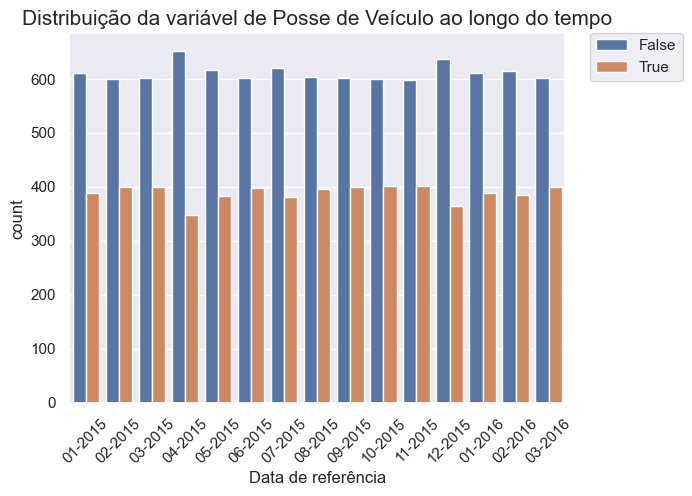

In [4]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_veiculo', data=dados)
plt.title('Distribuição da variável de Posse de Veículo ao longo do tempo', size=15)

dados_labs = dados['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=0)

plt.xticks(rotation=45)
plt.xlabel('Data de referência')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

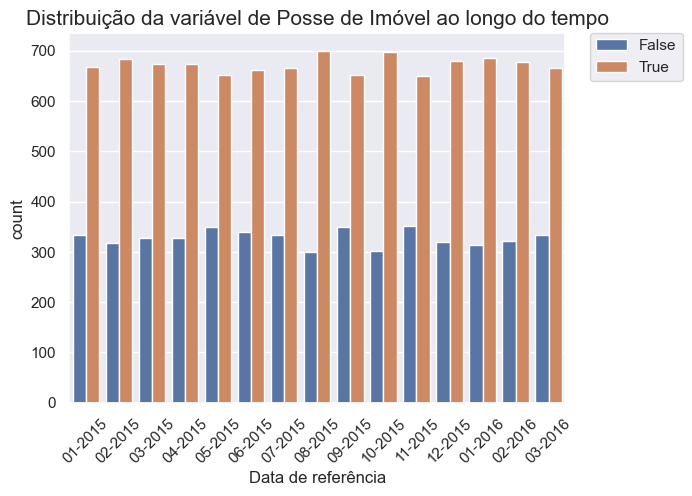

In [5]:
ax = sns.countplot(x='data_ref',  hue = 'posse_de_imovel', data=dados)
plt.title('Distribuição da variável de Posse de Imóvel ao longo do tempo', size=15)

dados_labs = dados['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()

ticks = ax.set_xticks(list(range(dados['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=0)

plt.xticks(rotation=45)
plt.xlabel('Data de referência')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

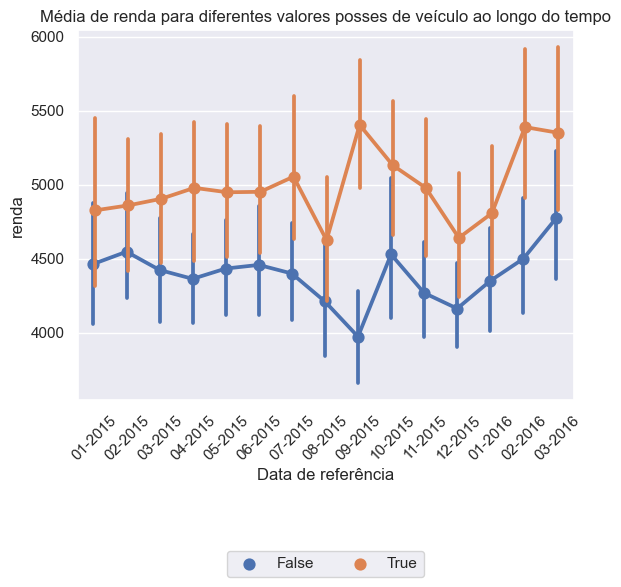

In [6]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_veiculo',
                   data=dados, dodge=True, ci = 95)
plt.title('Média de renda para diferentes valores posses de veículo ao longo do tempo')

dados_labs = dados['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(dados['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=0)

plt.xticks(rotation=45)
plt.xlabel('Data de referência')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.show()

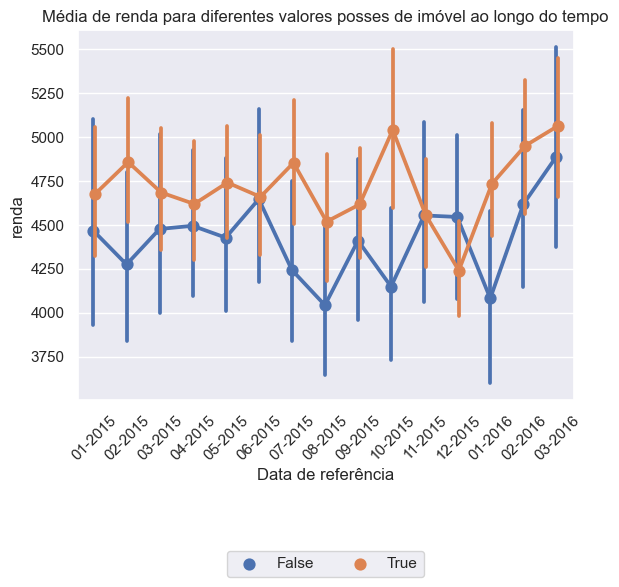

In [7]:
ax = sns.pointplot(x="data_ref", y="renda", hue = 'posse_de_imovel',
                   data=dados, dodge=True, ci = 95)
plt.title('Média de renda para diferentes valores posses de imóvel ao longo do tempo')

dados_labs = dados['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticks(list(range(dados['data_ref'].nunique())))
labels = ax.set_xticklabels(dados_labs, rotation=0)

plt.xticks(rotation=45)
plt.xlabel('Data de referência')
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.show()

Vemos que ambas as variáveis indicam que quem tem posse de veiculo e imóvel apresentam uma maior renda. Destaque para dezembro de 2015 em que houve maior renda para quem não tinha imóvel, mas de resto mantém-se a regra.